### 1. Extracting Twitter Data

In [25]:
import tweepy           
import pandas as pd     
import numpy as np      
import scipy

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# Twitter API keys

CONSUMER_KEY    = 'D7PQj2xuuw2CQunHiLFCUyy8v'
CONSUMER_SECRET = '0u9PwH9JhLsvndnsRv5tF2NyoH7KJim2CruJ4zVE7TsMZetHFi'

ACCESS_TOKEN  = '2163444086-30rJ2fINs8CNQiCslKpIMcSGC3eeqMMaQRLWesH'
ACCESS_SECRET = 'aQOkHU0pH5q5vEto6VnlNZYlUOm6EdrI5lPMDatFtk1dn'

In [27]:
# API setup
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
# Creating extractor object 
extractor = twitter_setup()

# Creating tweet list
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Most recent 5 tweets for Donald Trump
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

RT @SecAzar: .@POTUS has made clear that it’s time for drug companies to put American Patients First — Novartis halting its prescription dr…

The two biggest opponents of ICE in America today are the Democratic Party and MS-13!

Thank you to Congressman Kevin Yoder! He secured $5 BILLION for Border Security. Now we need Congress to support. K… https://t.co/Q36pGj6J0O

Brian Kemp is running for Governor of the great state of Georgia. The Primary is on Tuesday. Brian is tough on crim… https://t.co/5DYJn0DTgt

RT @SecretService: In Remembrance: Special Agent Nole E. Remagen. This week the U.S. Secret Service lost one of America’s finest. We ask fo…



In [5]:
# Data frame
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(20))

,Tweets
0,RT @SecAzar: .@POTUS has made clear that it’s ...
1,The two biggest opponents of ICE in America to...
2,Thank you to Congressman Kevin Yoder! He secur...
3,Brian Kemp is running for Governor of the grea...
4,RT @SecretService: In Remembrance: Special Age...
5,3.4 million jobs created since our great Elect...
6,Some people HATE the fact that I got along wel...
7,“A lot of Democrats wished they voted for the ...
8,Congratulations to Martha Roby of The Great St...
9,....Russia has agreed to help with North Korea...


In [6]:
# Examine elements of columns that we can use
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [7]:
# Select only necessary columns
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1019696867481964544
2018-07-18 21:34:12
Twitter for iPhone
0
765
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SecAzar', 'name': 'Alex Azar', 'id': 956283913835614208, 'id_str': '956283913835614208', 'indices': [3, 11]}, {'screen_name': 'POTUS', 'name': 'President Trump', 'id': 822215679726100480, 'id_str': '822215679726100480', 'indices': [14, 20]}], 'urls': []}


In [8]:
# Add columns for analysis
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['Retweets']    = np.array([tweet.retweet_count for tweet in tweets])

In [9]:
# Data frame is ready
display(data.head(20))

,Tweets,len,ID,Date,Source,Likes,Retweets
0,RT @SecAzar: .@POTUS has made clear that it’s ...,140,1019696867481964544,2018-07-18 21:34:12,Twitter for iPhone,0,765
1,The two biggest opponents of ICE in America to...,85,1019695889626083331,2018-07-18 21:30:19,Twitter for iPhone,10224,3123
2,Thank you to Congressman Kevin Yoder! He secur...,140,1019695583853010944,2018-07-18 21:29:06,Twitter for iPhone,7602,2074
3,Brian Kemp is running for Governor of the grea...,140,1019664477162278918,2018-07-18 19:25:30,Twitter for iPhone,37937,10671
4,RT @SecretService: In Remembrance: Special Age...,140,1019631102535897088,2018-07-18 17:12:53,Twitter for iPhone,0,8900
5,3.4 million jobs created since our great Elect...,140,1019545713435467776,2018-07-18 11:33:34,Twitter for iPhone,77137,17756
6,Some people HATE the fact that I got along wel...,140,1019544304853966853,2018-07-18 11:27:59,Twitter for iPhone,101172,26356
7,“A lot of Democrats wished they voted for the ...,140,1019538038651871233,2018-07-18 11:03:05,Twitter for iPhone,54163,12723
8,Congratulations to Martha Roby of The Great St...,140,1019533312052858880,2018-07-18 10:44:18,Twitter for iPhone,48978,10076
9,....Russia has agreed to help with North Korea...,140,1019526399542091776,2018-07-18 10:16:50,Twitter for iPhone,54529,13220


### 2. Visualization and Basic Statistics

In [10]:
# The mean of lengths
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 126.815


In [11]:
# Extracting the tweet by number of Likes and Retweets:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['Retweets'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.Retweets == rt_max].index[0]

# Max Likes:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max Retweets:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
They just didn't get it, but they do now! https://t.co/9T50NupkDy
Number of likes: 317706
65 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: They just didn't get it, but they do now! https://t.co/9T50NupkDy
Number of retweets: 108817
86 characters.



In [12]:
# Time series comparing Likes vs Retweets 

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['Retweets'].values, index=data['Date'])

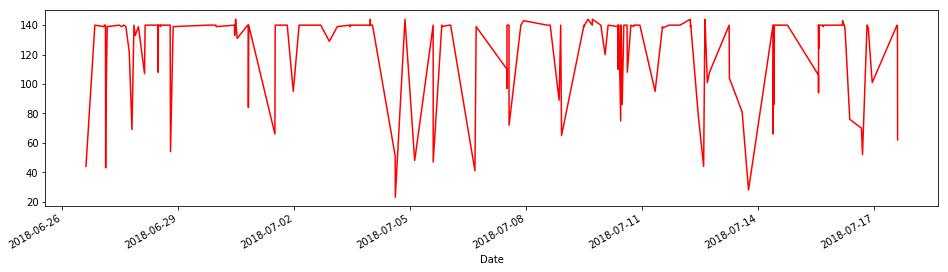

In [32]:
# Creating lenghts over time
tlen.plot(figsize=(16,4), color='r');

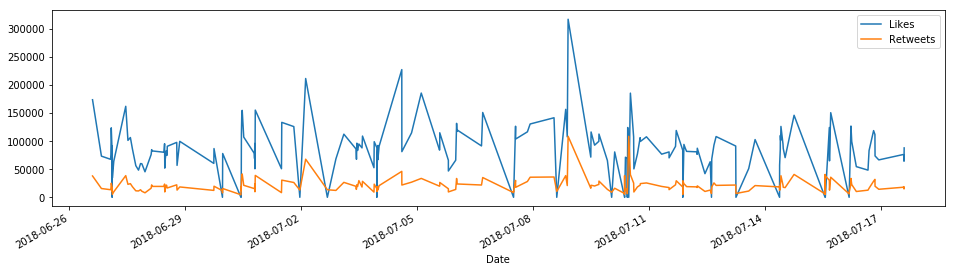

In [33]:
# Likes vs retweets graph
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### 3. Sentiment Analysis

In [14]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [15]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,Retweets,SA
0,RT @SecAzar: .@POTUS has made clear that it’s ...,140,1019696867481964544,2018-07-18 21:34:12,Twitter for iPhone,0,765,1
1,The two biggest opponents of ICE in America to...,85,1019695889626083331,2018-07-18 21:30:19,Twitter for iPhone,10224,3123,0
2,Thank you to Congressman Kevin Yoder! He secur...,140,1019695583853010944,2018-07-18 21:29:06,Twitter for iPhone,7602,2074,0
3,Brian Kemp is running for Governor of the grea...,140,1019664477162278918,2018-07-18 19:25:30,Twitter for iPhone,37937,10671,1
4,RT @SecretService: In Remembrance: Special Age...,140,1019631102535897088,2018-07-18 17:12:53,Twitter for iPhone,0,8900,-1
5,3.4 million jobs created since our great Elect...,140,1019545713435467776,2018-07-18 11:33:34,Twitter for iPhone,77137,17756,1
6,Some people HATE the fact that I got along wel...,140,1019544304853966853,2018-07-18 11:27:59,Twitter for iPhone,101172,26356,-1
7,“A lot of Democrats wished they voted for the ...,140,1019538038651871233,2018-07-18 11:03:05,Twitter for iPhone,54163,12723,0
8,Congratulations to Martha Roby of The Great St...,140,1019533312052858880,2018-07-18 10:44:18,Twitter for iPhone,48978,10076,1
9,....Russia has agreed to help with North Korea...,140,1019526399542091776,2018-07-18 10:16:50,Twitter for iPhone,54529,13220,1


#### Analyzing the results

In [16]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [17]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 47.0%
Percentage of neutral tweets: 35.5%
Percentage de negative tweets: 17.5%


#Step 2
Extract tweet texts from "data" and split them into words.
get word frequencies of trump's tweets and use "dendrogram" to cluster words into different groups to see which groups of words are associated to one another.
get WordAssociation to calculate probability of association (for example, when I input "Campaign", what words are associated with it? It has to be done based on Euclidean distance to see which words appeared under conditional probability logic)

#step 3
If we can, find other sources of data to see if there is positive/negative relationship with rise in Likes/ retweets from Trump's tweets and rise in stock price(?) of some company?? (or maybe something else..?)

###extra step
We can just add Natural Language Processing to identify which words are pos/neg/neu ??
